In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/home/m/Documents/DS Bootcamp/European_Rosters.csv')

In [3]:
df.head()

,FullName,PlayerName,Affiliation,League,Jersey,Birth Date,Age,birthPlace,Height (meters),Citizenship 1,...,Youth Club 7,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,MostRecentInjury
0,Anthony Mbu Agogo Modeste,Anthony Modeste,1. FC Koln,Bundesliga,#27,4/14/1988,31,Cannes,1.87,France,...,NaN,France,1,7000000.0,"Last update: Jun 12, 2019",45700000,20000000.0,6/19/2017,16,NaN
1,NaN,Benno Schmitz,1. FC Koln,Bundesliga,#2,11/17/1994,25,München,1.82,Germany,...,NaN,Germany,0,1000000.0,"Last update: Jun 12, 2019",1000000,1750000.0,3/22/2017,11,NaN
2,Birger Danny Verstraete,Birger Verstraete,1. FC Koln,Bundesliga,#8,4/16/1994,25,Oostende,1.75,Belgium,...,NaN,Belgium,0,4000000.0,"Last update: Jun 10, 2019",4850000,4000000.0,9/11/2018,1,NaN
3,Brady Canfield Scott,Brady Scott,1. FC Koln,Bundesliga,#31,6/30/1999,20,"Petaluma, California",1.87,United States,...,NaN,United States,14,100000.0,"Last update: Jun 12, 2019",0,100000.0,8/3/2018,0,NaN
4,NaN,Christian Clemens,1. FC Koln,Bundesliga,#17,8/4/1991,28,Köln,1.79,Germany,...,NaN,Germany,15,1750000.0,"Last update: Jun 12, 2019",7950000,3500000.0,6/29/2013,5,NaN


In [4]:
df['Market Value (Euros)'].max()

200000000.0

In [5]:
df['Market Value (Euros)'].min()

25000.0

<AxesSubplot:xlabel='League', ylabel='Market Value (Euros)'>

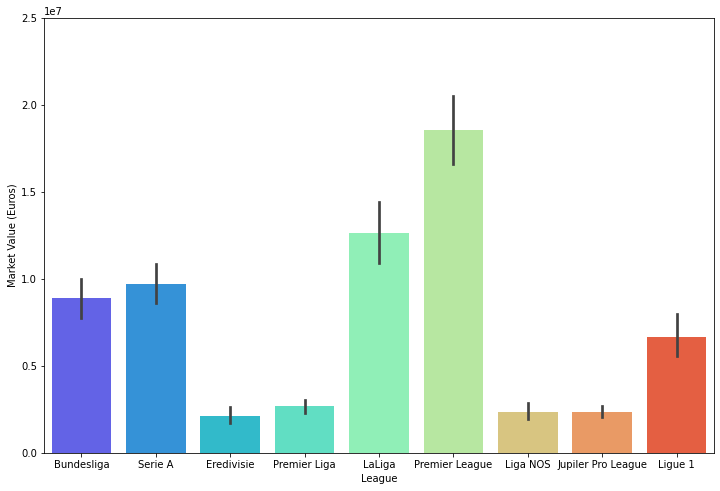

In [6]:
plt.figure(figsize=(12,8))
plt.axis([0, 10, 0, 25000000])
sns.barplot(x='League', y='Market Value (Euros)', data=df, palette='rainbow')

Premier league has the maximum players with top market value followed by LaLiga and Serie A

In [7]:
df.describe()

,Age,Height (meters),Games Played,Market Value (Euros),Accumulated Transfer Sums (Euros),Highest Market Value (Euros),NationalTeamCaps
count,4308.000000,4225.000000,4308.000000,4.289000e+03,4.308000e+03,4.091000e+03,4308.000000
mean,25.451718,1.825931,2.518802,7.714625e+06,7.812063e+06,9.992899e+06,11.292943
std,4.429018,0.066534,10.159712,1.474037e+07,1.741673e+07,1.656523e+07,20.133501
min,16.000000,1.590000,0.000000,2.500000e+04,0.000000e+00,2.500000e+04,0.000000
25%,22.000000,1.780000,0.000000,7.000000e+05,0.000000e+00,1.200000e+06,0.000000
50%,25.000000,1.830000,0.000000,2.500000e+06,1.000000e+06,4.000000e+06,3.000000
75%,29.000000,1.870000,2.000000,8.000000e+06,7.957500e+06,1.200000e+07,12.000000
max,42.000000,2.040000,255.000000,2.000000e+08,3.102000e+08,2.000000e+08,176.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FullName                           2052 non-null   object 
 1   PlayerName                         4308 non-null   object 
 2   Affiliation                        4308 non-null   object 
 3   League                             4308 non-null   object 
 4   Jersey                             4239 non-null   object 
 5   Birth Date                         4308 non-null   object 
 6   Age                                4308 non-null   int64  
 7   birthPlace                         4150 non-null   object 
 8   Height (meters)                    4225 non-null   float64
 9   Citizenship 1                      4298 non-null   object 
 10  Citizenship 2                      742 non-null    object 
 11  Position                           4240 non-null   objec

In [9]:
#Differentiating Premier League data from the rest of the league


df_pl = df[df['League']=='Premier League']

In [10]:
#Setting index as Player Names
df_pl = df_pl.set_index('PlayerName')

In [11]:
#Finding out the name of the player with the maximum transfer value

df_pl['Market Value (Euros)'].idxmax()

'Mohamed Salah'

Mohamed Salah is the most expensive player from the Premier League

In [12]:
df.groupby('Affiliation').mean()['Market Value (Euros)'].idxmax()

'Man City'

Man City is the most valueable club in Europe

In [13]:
df.groupby('Affiliation').mean()['Market Value (Euros)'].idxmin()

'RKC Waalwijk'

RKC Waalwijk is the least valuable club in Europe

**The top 5 most valuable clubs in Europe**

In [14]:
df.groupby('Affiliation').sum()['Market Value (Euros)'].sort_values(ascending=False).head(5)

Affiliation
Man City        1.277500e+09
Real Madrid     1.189500e+09
FC Barcelona    1.176000e+09
Liverpool       1.072750e+09
Paris SG        1.050650e+09
Name: Market Value (Euros), dtype: float64

In [15]:
#Find out clubs worth more than 250 million euros
cde = df.groupby('Affiliation').sum()
plt.figure(figsize=(15,7))
cde[cde['Market Value (Euros)'] > 250000000]['Market Value (Euros)']


Affiliation
AC Milan           5.050000e+08
AS Roma            4.224000e+08
Ajax               3.759000e+08
Arsenal            6.907500e+08
Atalanta           2.651000e+08
Atletico Madrid    8.725000e+08
Bay. Leverkusen    4.152500e+08
Bayern Munich      8.826500e+08
Benfica            3.200000e+08
Bor. Dortmund      6.405000e+08
Bor. M'gladbach    2.705000e+08
Bournemouth        3.342500e+08
Chelsea            8.070000e+08
Everton            5.060000e+08
FC Barcelona       1.176000e+09
FC Porto           2.624000e+08
Fiorentina         2.592000e+08
Inter              5.673000e+08
Juventus           8.375000e+08
Lazio              3.014500e+08
Leicester          4.102500e+08
Liverpool          1.072750e+09
Man City           1.277500e+09
Man Utd            7.532500e+08
Monaco             3.542500e+08
Newcastle          2.735750e+08
Olympique Lyon     3.677000e+08
Paris SG           1.050650e+09
RB Leipzig         5.444000e+08
Real Betis         2.925000e+08
Real Madrid        1.189500e

<Figure size 1080x504 with 0 Axes>

**Incredible! The difference in team market value between top club in Europe is drastic as well. Teams such as Newcastle (270 million) & Manchester City (1.27 billion) could play eachother any given week**

<AxesSubplot:xlabel='Affiliation'>

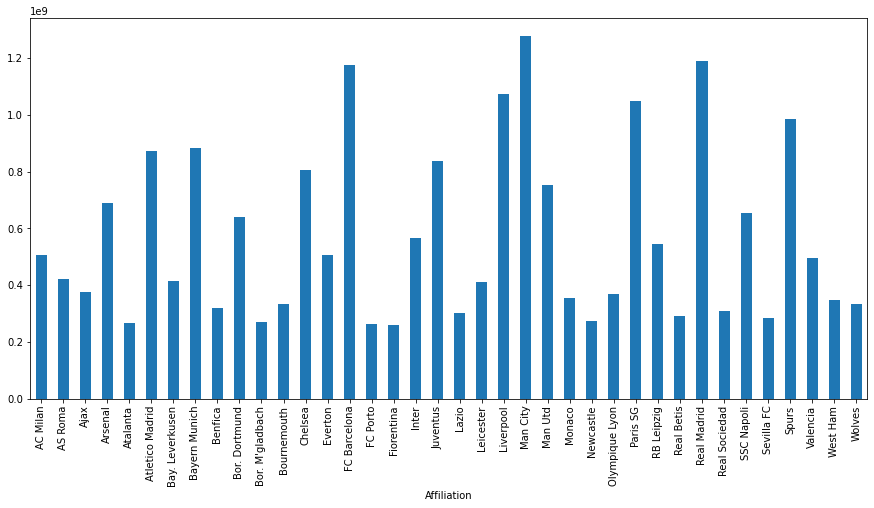

In [16]:
#Let's plot this data 
plt.figure(figsize=(15,7))
cde[cde['Market Value (Euros)'] > 250000000]['Market Value (Euros)'].plot(kind='bar')

<AxesSubplot:>

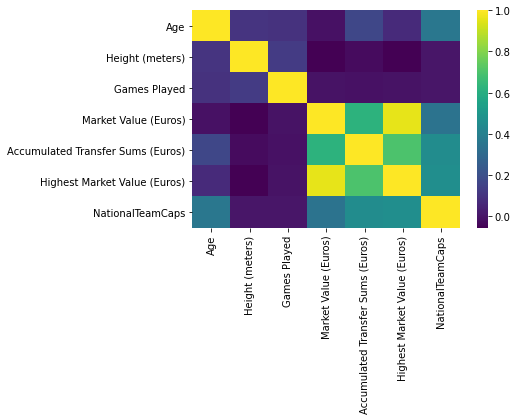

In [17]:
#Transfer market value is highly correlated to highest market value and accumulated transfer sums
fg= df.corr()
sns.heatmap(fg, cmap='viridis')

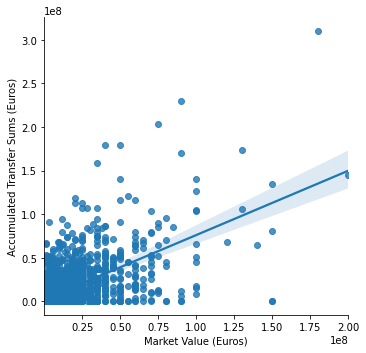

In [18]:
sns.lmplot(x='Market Value (Euros)', y='Accumulated Transfer Sums (Euros)', data=df)

**Finding out which club contains the most valuable players in Europe's top 5 leagues**

<AxesSubplot:xlabel='Market Value (Euros)', ylabel='Affiliation'>

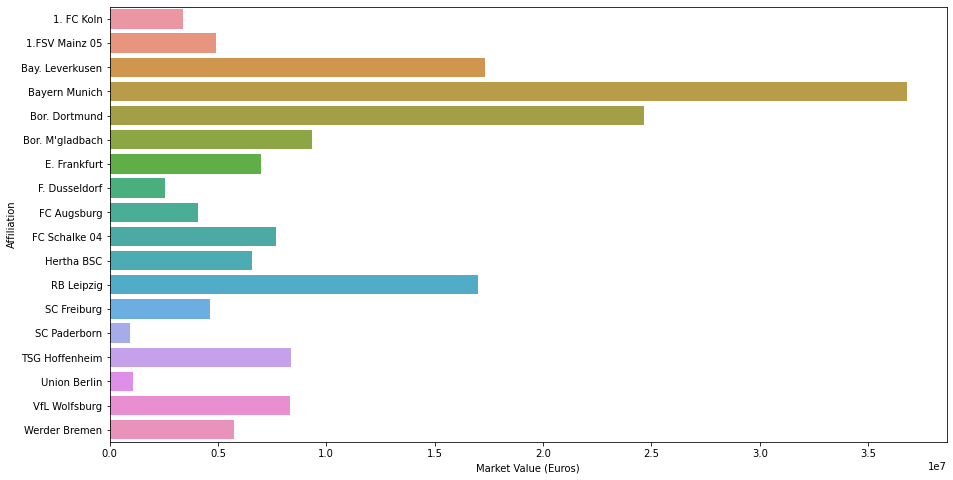

In [19]:
#Bundesliga
plt.figure(figsize=(15,8))
sns.barplot(y='Affiliation', x='Market Value (Euros)', data=df[df['League']=='Bundesliga'], ci=None)

<AxesSubplot:xlabel='Market Value (Euros)', ylabel='Affiliation'>

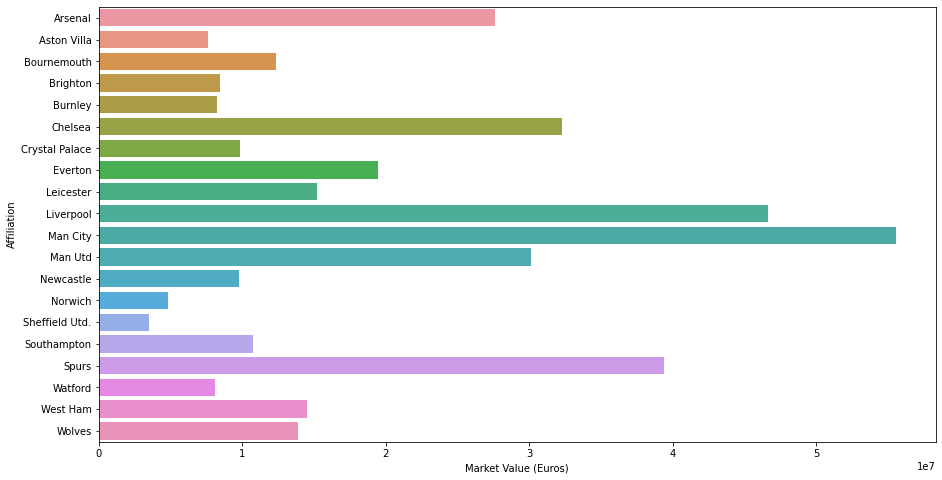

In [20]:
#Premier League
plt.figure(figsize=(15,8))
sns.barplot(y='Affiliation', x='Market Value (Euros)', data=df[df['League']=='Premier League'], ci=None)

<AxesSubplot:xlabel='Market Value (Euros)', ylabel='Affiliation'>

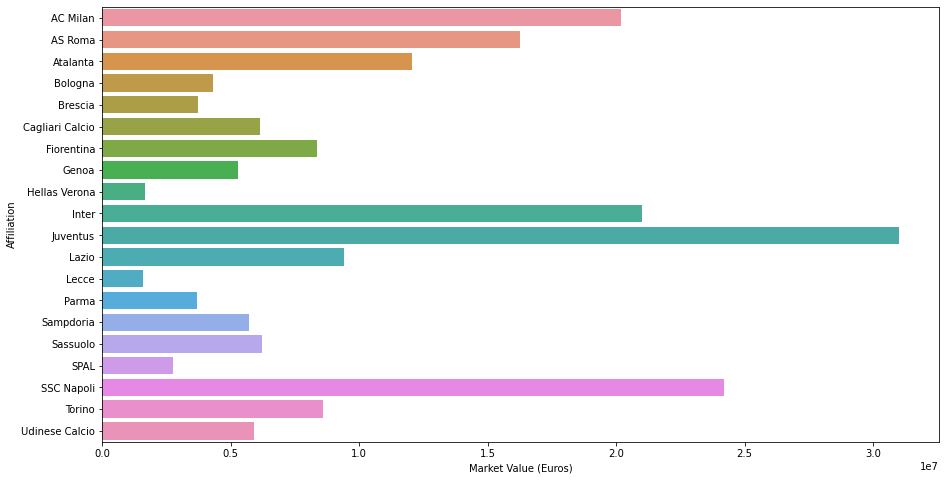

In [21]:
#Serie A
plt.figure(figsize=(15,8))
sns.barplot(y='Affiliation', x='Market Value (Euros)', data=df[df['League']=='Serie A'], ci=None)

<AxesSubplot:xlabel='Market Value (Euros)', ylabel='Affiliation'>

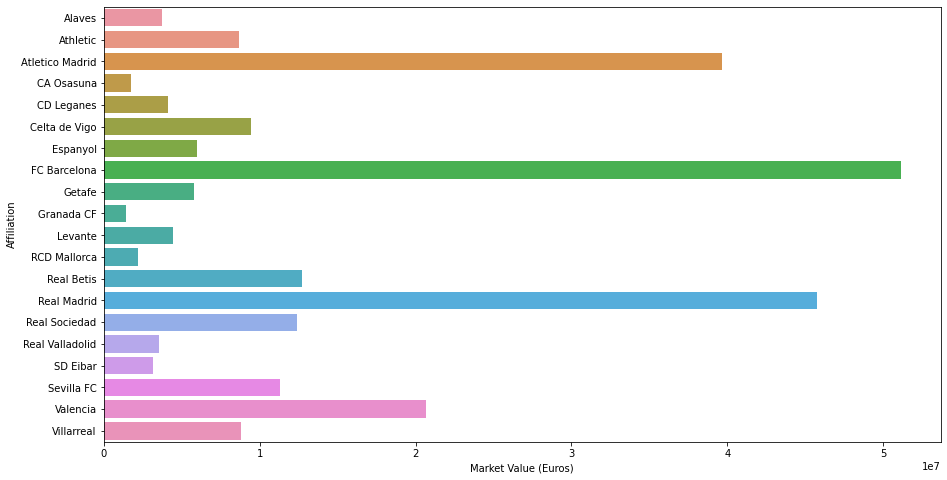

In [22]:
#La Liga
plt.figure(figsize=(15,8))
sns.barplot(y='Affiliation', x='Market Value (Euros)', data=df[df['League']=='LaLiga'], ci=None)

<AxesSubplot:xlabel='Market Value (Euros)', ylabel='Affiliation'>

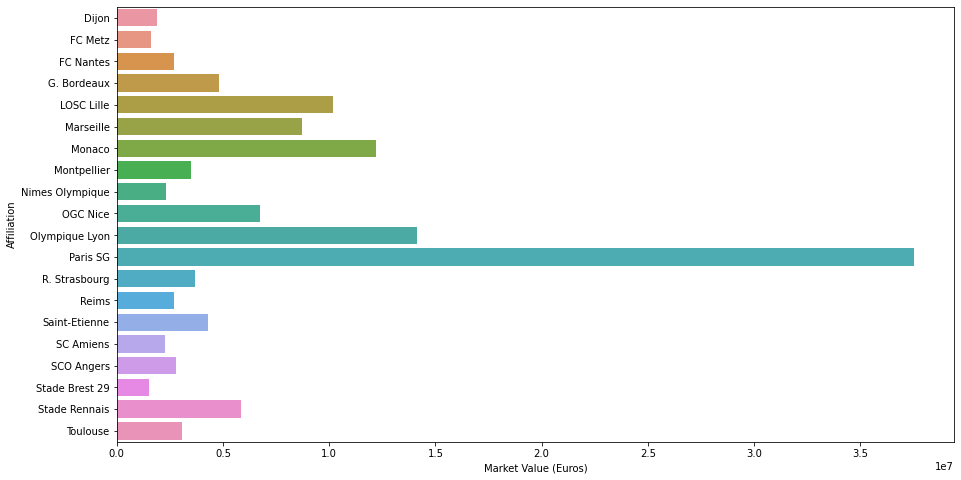

In [23]:
#Ligue 1
plt.figure(figsize=(15,8))
sns.barplot(y='Affiliation', x='Market Value (Euros)', data=df[df['League']=='Ligue 1'], ci=None)

**You can see how market value is inequally distributed all the leagues but this difference is more visible in the leagues like La Liga and Ligue 1**

In [24]:
#Now lets's find out the most expensive player

df.groupby('PlayerName')['Market Value (Euros)'].sum().idxmax()

'Kylian Mbappe'

In [25]:
#The least expensive player

df.groupby('PlayerName')['Market Value (Euros)'].sum().idxmin()

'Boris Essele'

# Getting rid of null values and cleaning data

In [26]:
df.head()

,FullName,PlayerName,Affiliation,League,Jersey,Birth Date,Age,birthPlace,Height (meters),Citizenship 1,...,Youth Club 7,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,MostRecentInjury
0,Anthony Mbu Agogo Modeste,Anthony Modeste,1. FC Koln,Bundesliga,#27,4/14/1988,31,Cannes,1.87,France,...,NaN,France,1,7000000.0,"Last update: Jun 12, 2019",45700000,20000000.0,6/19/2017,16,NaN
1,NaN,Benno Schmitz,1. FC Koln,Bundesliga,#2,11/17/1994,25,München,1.82,Germany,...,NaN,Germany,0,1000000.0,"Last update: Jun 12, 2019",1000000,1750000.0,3/22/2017,11,NaN
2,Birger Danny Verstraete,Birger Verstraete,1. FC Koln,Bundesliga,#8,4/16/1994,25,Oostende,1.75,Belgium,...,NaN,Belgium,0,4000000.0,"Last update: Jun 10, 2019",4850000,4000000.0,9/11/2018,1,NaN
3,Brady Canfield Scott,Brady Scott,1. FC Koln,Bundesliga,#31,6/30/1999,20,"Petaluma, California",1.87,United States,...,NaN,United States,14,100000.0,"Last update: Jun 12, 2019",0,100000.0,8/3/2018,0,NaN
4,NaN,Christian Clemens,1. FC Koln,Bundesliga,#17,8/4/1991,28,Köln,1.79,Germany,...,NaN,Germany,15,1750000.0,"Last update: Jun 12, 2019",7950000,3500000.0,6/29/2013,5,NaN


In [27]:
#Trying to find out the null values
df.isnull().sum()

FullName                             2256
PlayerName                              0
Affiliation                             0
League                                  0
Jersey                                 69
Birth Date                              0
Age                                     0
birthPlace                            158
Height (meters)                        83
Citizenship 1                          10
Citizenship 2                        3566
Position                               68
Position 2                              1
Foot                                  210
Agent                                 689
JoinedClub                           1870
LastExtension                        2890
ContractExpiration                    377
PlayerSponsor                        3342
Youth Club 1                         1303
Youth Club 2                         2426
Youth Club 3                         3433
Youth Club 4                         3999
Youth Club 5                      

In [28]:
df.corr()['Market Value (Euros)']

Age                                 -0.006263
Height (meters)                     -0.050873
Games Played                        -0.004245
Market Value (Euros)                 1.000000
Accumulated Transfer Sums (Euros)    0.624004
Highest Market Value (Euros)         0.960081
NationalTeamCaps                     0.348249
Name: Market Value (Euros), dtype: float64

<AxesSubplot:xlabel='Market Value (Euros)', ylabel='Highest Market Value (Euros)'>

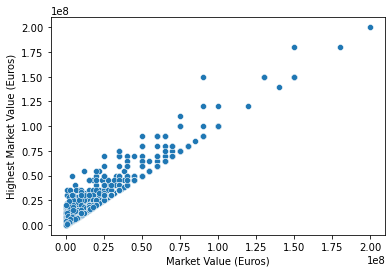

In [29]:
sns.scatterplot(x='Market Value (Euros)', y ='Highest Market Value (Euros)', data=df)

<AxesSubplot:xlabel='Age', ylabel='Market Value (Euros)'>

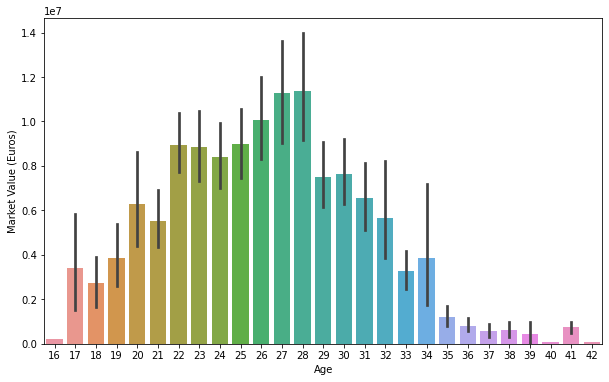

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age', y='Market Value (Euros)', data=df)

**We can see that the player's value starts growing from the age of 17 and grows till 28 which is considered the prime of many players in football.**

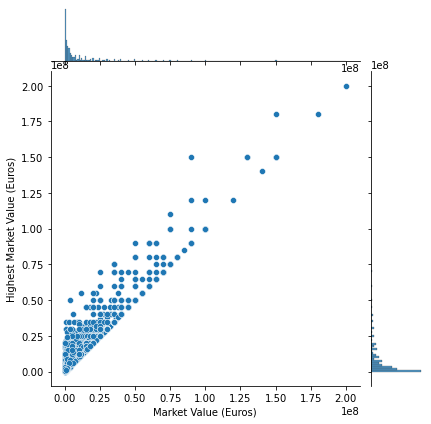

In [31]:
sns.jointplot(x='Market Value (Euros)', y ='Highest Market Value (Euros)', data=df)

we can check if league actually affects our market price

<AxesSubplot:xlabel='League', ylabel='Market Value (Euros)'>

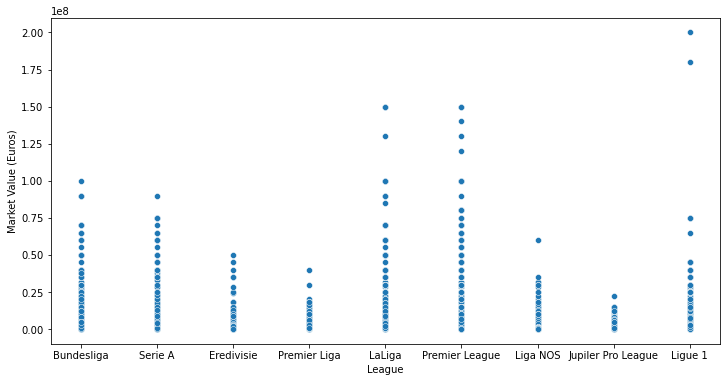

In [32]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='League', y='Market Value (Euros)', data=df)

**We will keep only the data from the top leagues**

In [33]:
league_list = ['Premier League', 'Bundesliga', 'LaLiga', 'Ligue 1','Serie A']

filtered_df = df[df['League'].isin(league_list)]

In [34]:
filtered_df.head(2)

,FullName,PlayerName,Affiliation,League,Jersey,Birth Date,Age,birthPlace,Height (meters),Citizenship 1,...,Youth Club 7,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,MostRecentInjury
0,Anthony Mbu Agogo Modeste,Anthony Modeste,1. FC Koln,Bundesliga,#27,4/14/1988,31,Cannes,1.87,France,...,NaN,France,1,7000000.0,"Last update: Jun 12, 2019",45700000,20000000.0,6/19/2017,16,NaN
1,NaN,Benno Schmitz,1. FC Koln,Bundesliga,#2,11/17/1994,25,München,1.82,Germany,...,NaN,Germany,0,1000000.0,"Last update: Jun 12, 2019",1000000,1750000.0,3/22/2017,11,NaN


In [35]:
filtered_df.isnull().sum()

FullName                             1288
PlayerName                              0
Affiliation                             0
League                                  0
Jersey                                 16
Birth Date                              0
Age                                     0
birthPlace                             36
Height (meters)                        16
Citizenship 1                           1
Citizenship 2                        2130
Position                               13
Position 2                              1
Foot                                   60
Agent                                 357
JoinedClub                           1216
LastExtension                        1725
ContractExpiration                    215
PlayerSponsor                        1865
Youth Club 1                          672
Youth Club 2                         1444
Youth Club 3                         2084
Youth Club 4                         2422
Youth Club 5                      

In [36]:
#We can see that FullName is missing from a lot of places however we still have PlayerName column with o missing data
#We can drop FullName from this database

filtered_df = filtered_df.drop('FullName', axis=1)

In [37]:
#Let's see how many unique citizenships are there

filtered_df['Citizenship 1'].nunique()

105

In [38]:
filtered_df['Citizenship 2'].nunique()

81

**Realistically there are too many unique citizenship values to try to convert this to a dummy variable feature. Let's remove that citizenship 1 and 2 column**

In [39]:
filtered_df = filtered_df.drop(['Citizenship 1', 'Citizenship 2'], axis=1)

In [40]:
filtered_df.isnull().sum()

PlayerName                              0
Affiliation                             0
League                                  0
Jersey                                 16
Birth Date                              0
Age                                     0
birthPlace                             36
Height (meters)                        16
Position                               13
Position 2                              1
Foot                                   60
Agent                                 357
JoinedClub                           1216
LastExtension                        1725
ContractExpiration                    215
PlayerSponsor                        1865
Youth Club 1                          672
Youth Club 2                         1444
Youth Club 3                         2084
Youth Club 4                         2422
Youth Club 5                         2552
Youth Club 6                         2598
Youth Club 7                         2616
nationality                       

In [41]:
#Let's check youth club data to see if it is okay to drop it
filtered_df['Youth Club 1'].nunique()

1857

In [42]:
filtered_df['Youth Club 2'].nunique()

1128

In [43]:
filtered_df['Youth Club 3'].nunique()

527

In [44]:
filtered_df['Youth Club 4'].nunique()

197

In [45]:
filtered_df['Youth Club 5'].nunique()

68

In [46]:
filtered_df['Youth Club 6'].nunique()

23

In [47]:
filtered_df['Youth Club 7'].nunique()

5

Togther they all make a lot of unique values which will be tough to convert into dummy values. We will drop them

In [48]:
filtered_df = filtered_df.drop(['Youth Club 1', 'Youth Club 2', 'Youth Club 3', 'Youth Club 4', 'Youth Club 5', 'Youth Club 6', 'Youth Club 7'], axis=1)

In [49]:
filtered_df.head(2)

,PlayerName,Affiliation,League,Jersey,Birth Date,Age,birthPlace,Height (meters),Position,Position 2,...,PlayerSponsor,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,MostRecentInjury
0,Anthony Modeste,1. FC Koln,Bundesliga,#27,4/14/1988,31,Cannes,1.87,Forward,Centre-Forward,...,NaN,France,1,7000000.0,"Last update: Jun 12, 2019",45700000,20000000.0,6/19/2017,16,NaN
1,Benno Schmitz,1. FC Koln,Bundesliga,#2,11/17/1994,25,München,1.82,Defender,Right-Back,...,NaN,Germany,0,1000000.0,"Last update: Jun 12, 2019",1000000,1750000.0,3/22/2017,11,NaN


In [50]:
filtered_df['PlayerSponsor'].isnull().sum()

1865

In [51]:
print(len(filtered_df['PlayerSponsor']))

2621


**As we see that out of 2621 values of Player Sponsor, 1865 are null, we can remove them**

In [52]:
filtered_df = filtered_df.drop('PlayerSponsor', axis=1)

In [53]:
filtered_df['Jersey'].dropna().unique()

array(['#27', '#2', '#8', '#31', '#17', '#39', '#24', '#28', '#30', '#15',
       '#14', '#22', '#32', '#19', '#11', '#3', '#13', '#7', '#6', '#35',
       '#36', '#34', '#5', '#33', '#9', '#18', '#1', '#21', '#42', '#10',
       '#20', '#37', '#4', '#29', '#23', '#16', '#12', '#90', '#79',
       '#99', '#43', '#46', '#25', '#68', '#77', '#26', '#83', '#63',
       '#48', '#40', '#91', '#72', '#57', '#88', '#95', '#41', '#38',
       '#97', '#45', '#44', '#49', '#93', '#69', '#78', '#96', '#98',
       '#66', '#87', '#85', '#62', '#47', '#53', '#64', '#56', '#73',
       '#67', '#70', '#50'], dtype=object)

In [54]:
filtered_df['Jersey'].nunique()

78

In [55]:
#There are a lot of jersey number values which in real life don't usually make an impact on how a player is valued
#We can drop jersey as well
filtered_df = filtered_df.drop('Jersey', axis=1)


In [56]:
filtered_df.isnull().sum()

PlayerName                              0
Affiliation                             0
League                                  0
Birth Date                              0
Age                                     0
birthPlace                             36
Height (meters)                        16
Position                               13
Position 2                              1
Foot                                   60
Agent                                 357
JoinedClub                           1216
LastExtension                        1725
ContractExpiration                    215
nationality                             0
Games Played                            0
Market Value (Euros)                   12
Last Updated Date                      12
Accumulated Transfer Sums (Euros)       0
Highest Market Value (Euros)          112
Highest Market Value Date             112
NationalTeamCaps                        0
MostRecentInjury                     2293
dtype: int64

In [57]:
len(filtered_df['LastExtension'])

2621

In [58]:
filtered_df['LastExtension'].isnull().sum()

1725

In [59]:
#Since majority of this data is missing, we will drop the last extension column as well

filtered_df = filtered_df.drop('LastExtension', axis=1)

In [60]:
filtered_df['Agent'].nunique()

669

In [61]:
filtered_df['Agent'].value_counts()

Relatives               100
Stellar Football Ltd     67
not clarified            51
no agent                 42
ROGON                    39
                       ... 
Madeira Sports            1
SPORTS ACTION             1
EMD Sports GmbH           1
NL-Soccer                 1
Global Football ...       1
Name: Agent, Length: 669, dtype: int64

In [62]:
#A lot of data from agent is missing and the one which is available is also vague, we will be dropping agent columns as well
filtered_df = filtered_df.drop('Agent', axis=1)

In [63]:
filtered_df['ContractExpiration'].nunique()

21

In [64]:
filtered_df['ContractExpiration'].value_counts()

30.06.2022                     572
30.06.2021                     554
30.06.2020                     536
30.06.2023                     458
30.06.2024                     219
-                               21
30.06.2025                      19
31.05.2020                       5
Contract expires:30.06.2022      4
Contract expires:30.06.2023      3
30.06.2026                       3
Contract expires:-               3
Contract expires:30.06.2020      1
30.06.2019                       1
06.01.2020                       1
31.12.2020                       1
Contract expires:30.06.2021      1
30.06.2028                       1
31.12.2021                       1
31.12.2019                       1
31.01.2020                       1
Name: ContractExpiration, dtype: int64

In [65]:
#We can fill the na values in Contract Expiration with the average value of years which is 2022
df['ContractExpiration'] = df['ContractExpiration'].fillna('30.06.2022')

In [66]:
df['ContractExpiration'].isnull().sum()

0

In [67]:
#we see someplaces though that the value of contract expiration is not datetime but a string plus datetime
filtered_df.loc[filtered_df['ContractExpiration']=='Contract expires:30.06.2022'] 

,PlayerName,Affiliation,League,Birth Date,Age,birthPlace,Height (meters),Position,Position 2,Foot,...,ContractExpiration,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,MostRecentInjury
1116,Beni Baningime,Everton,Premier League,9/9/1998,21,Kinshasa,NaN,NaN,Contract expires:30.06.2022,NaN,...,Contract expires:30.06.2022,DR Congo,0,2000000.0,"Last update: Jun 13, 2019",0,3000000.0,5/28/2018,0,NaN
1155,Kelvin Ofori,F. Dusseldorf,Bundesliga,7/27/2001,18,NaN,NaN,NaN,Contract expires:30.06.2022,NaN,...,Contract expires:30.06.2022,Ghana,1,300000.0,"Last update: Aug 7, 2019",0,NaN,NaN,0,NaN
2231,Abdallah Ali Mohamed,Marseille,Ligue 1,4/11/1999,20,Moroni,NaN,NaN,Contract expires:30.06.2022,right,...,Contract expires:30.06.2022,Comoros,0,150000.0,"Last update: Jul 24, 2019",0,NaN,NaN,5,NaN
2253,Simon Ngapandouetnbu,Marseille,Ligue 1,4/12/2003,16,Foumban,NaN,NaN,Contract expires:30.06.2022,NaN,...,Contract expires:30.06.2022,Cameroon,0,NaN,NaN,0,NaN,NaN,0,NaN


In [68]:
#I created a function here which changes all the values which did not have datetime format
def fhx(x):
    if x == 'Contract expires:30.06.2022':
        return '30.06.2022'
    elif x == 'Contract expires:30.06.2023':
        return '30.06.2023'
    elif x == 'Contract expires:-':
        return '30.06.2022'
    elif x == 'Contract expires:30.06.2021':
        return '30.06.2021'
    elif x == 'nan':
        return '30.06.2022'
    elif x == 'Contract expires:30.06.2020':
        return '30.06.2020'
    elif x == '-':
        return '30.06.2020'
    
    else:
        return x

filtered_df['ContractExpiration']=filtered_df['ContractExpiration'].apply(fhx)


In [69]:
filtered_df['ContractExpiration'].value_counts()

30.06.2022    579
30.06.2020    558
30.06.2021    555
30.06.2023    461
30.06.2024    219
30.06.2025     19
31.05.2020      5
30.06.2026      3
30.06.2019      1
30.06.2028      1
31.12.2021      1
31.01.2020      1
31.12.2020      1
06.01.2020      1
31.12.2019      1
Name: ContractExpiration, dtype: int64

In [70]:
filtered_df['ContractExpiration']= filtered_df['ContractExpiration'].dropna()

In [71]:
filtered_df['ContractExpiration'].unique()

array(['30.06.2023', '30.06.2022', '30.06.2021', '30.06.2020', nan,
       '30.06.2024', '31.01.2020', '30.06.2028', '30.06.2026',
       '30.06.2025', '31.05.2020', '06.01.2020', '30.06.2019',
       '31.12.2020', '31.12.2019', '31.12.2021'], dtype=object)

In [72]:
#Converting this data to datetime format
filtered_df['ContractExpiration']= pd.to_datetime(filtered_df['ContractExpiration'])

In [73]:
#Getting contract expiration year out of this datetime
filtered_df['ContractExpYear'] = filtered_df['ContractExpiration'].apply(lambda x:x.year)

In [74]:
filtered_df['ContractExpYear']

0       2023.0
1       2022.0
2       2023.0
3       2021.0
4       2021.0
         ...  
4251    2023.0
4252    2024.0
4253    2022.0
4254    2021.0
4255    2021.0
Name: ContractExpYear, Length: 2621, dtype: float64

In [75]:
#Now that we have contract expiration year as an int value, we can remove the contractexpiration column
filtered_df = filtered_df.drop('ContractExpiration', axis=1)

<AxesSubplot:xlabel='ContractExpYear', ylabel='Market Value (Euros)'>

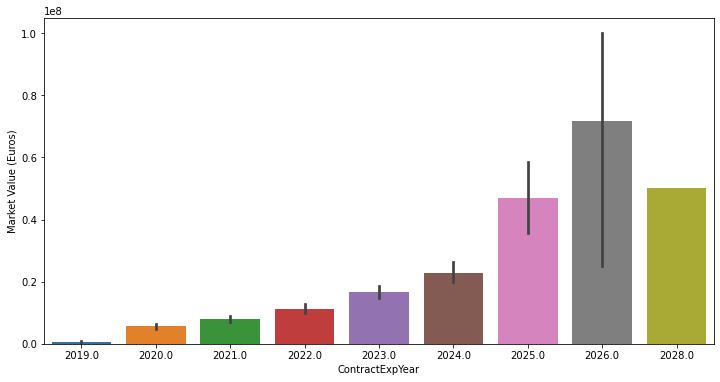

In [76]:
#Now lets see if contract expiration year has any relation with the market value of a player
plt.figure(figsize=(12,6))
sns.barplot(x='ContractExpYear', y='Market Value (Euros)', data= filtered_df)

# We can see that as the contract expiration year goes up, value also goes up which makes sense

In [77]:
filtered_df.isnull().sum()

PlayerName                              0
Affiliation                             0
League                                  0
Birth Date                              0
Age                                     0
birthPlace                             36
Height (meters)                        16
Position                               13
Position 2                              1
Foot                                   60
JoinedClub                           1216
nationality                             0
Games Played                            0
Market Value (Euros)                   12
Last Updated Date                      12
Accumulated Transfer Sums (Euros)       0
Highest Market Value (Euros)          112
Highest Market Value Date             112
NationalTeamCaps                        0
MostRecentInjury                     2293
ContractExpYear                       215
dtype: int64

In [78]:
len(filtered_df['JoinedClub'])

2621

In [79]:
filtered_df['JoinedClub'].nunique()

410

In [80]:
#Due to too many unique values and half of them being null, it would be better if we drop Joined Club column
filtered_df = filtered_df.drop('JoinedClub', axis=1) 

In [81]:
#Most values of RecentInjury columns are null as we can see. We will be dropping this column as well
filtered_df = filtered_df.drop('MostRecentInjury', axis=1) 

In [82]:
filtered_df.isnull().sum()

PlayerName                             0
Affiliation                            0
League                                 0
Birth Date                             0
Age                                    0
birthPlace                            36
Height (meters)                       16
Position                              13
Position 2                             1
Foot                                  60
nationality                            0
Games Played                           0
Market Value (Euros)                  12
Last Updated Date                     12
Accumulated Transfer Sums (Euros)      0
Highest Market Value (Euros)         112
Highest Market Value Date            112
NationalTeamCaps                       0
ContractExpYear                      215
dtype: int64

In [83]:
#Contract Exp Year has 215 null values. We will fill that value with the mean value of the year
filtered_df['ContractExpYear'].mean()

2021.7007481296757

In [84]:
filtered_df['ContractExpYear'] = filtered_df['ContractExpYear'].fillna(2022)

In [85]:
#Now lets analyze foot column
filtered_df['Foot']

0       right
1       right
2       right
3       right
4       right
        ...  
4251    right
4252     left
4253     left
4254    right
4255    right
Name: Foot, Length: 2621, dtype: object

<AxesSubplot:xlabel='Foot', ylabel='Market Value (Euros)'>

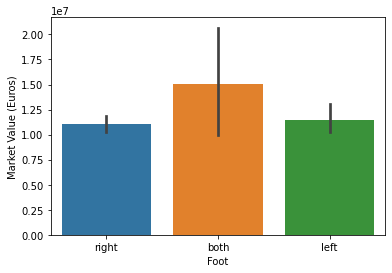

In [86]:
sns.barplot(x='Foot', y='Market Value (Euros)', data=filtered_df)

**We can see that both strong foot players are valued more followed by left foot and then right foot**

In [87]:
#We cannot drop the foot column as it has a direct connection with the market value of a player
#To replace the null values of foot 
filtered_df['Foot'].value_counts()

right    1819
left      639
both      103
Name: Foot, dtype: int64

In [88]:
filtered_df.head()

,PlayerName,Affiliation,League,Birth Date,Age,birthPlace,Height (meters),Position,Position 2,Foot,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,ContractExpYear
0,Anthony Modeste,1. FC Koln,Bundesliga,4/14/1988,31,Cannes,1.87,Forward,Centre-Forward,right,France,1,7000000.0,"Last update: Jun 12, 2019",45700000,20000000.0,6/19/2017,16,2023.0
1,Benno Schmitz,1. FC Koln,Bundesliga,11/17/1994,25,München,1.82,Defender,Right-Back,right,Germany,0,1000000.0,"Last update: Jun 12, 2019",1000000,1750000.0,3/22/2017,11,2022.0
2,Birger Verstraete,1. FC Koln,Bundesliga,4/16/1994,25,Oostende,1.75,Midfielder,Defensive Midfield,right,Belgium,0,4000000.0,"Last update: Jun 10, 2019",4850000,4000000.0,9/11/2018,1,2023.0
3,Brady Scott,1. FC Koln,Bundesliga,6/30/1999,20,"Petaluma, California",1.87,Goalkeeper,Goalkeeper,right,United States,14,100000.0,"Last update: Jun 12, 2019",0,100000.0,8/3/2018,0,2021.0
4,Christian Clemens,1. FC Koln,Bundesliga,8/4/1991,28,Köln,1.79,Midfielder,Right Midfield,right,Germany,15,1750000.0,"Last update: Jun 12, 2019",7950000,3500000.0,6/29/2013,5,2021.0


In [89]:
filtered_df['Foot'].value_counts()

right    1819
left      639
both      103
Name: Foot, dtype: int64

In [90]:
#We will fill the foot data with the maximum class method
#In this case we see that majority players have their right foot as strong foot
#We will fill the null values with right foot

filtered_df['Foot']= filtered_df['Foot'].fillna('right')

In [91]:
filtered_df.isnull().sum()

PlayerName                             0
Affiliation                            0
League                                 0
Birth Date                             0
Age                                    0
birthPlace                            36
Height (meters)                       16
Position                              13
Position 2                             1
Foot                                   0
nationality                            0
Games Played                           0
Market Value (Euros)                  12
Last Updated Date                     12
Accumulated Transfer Sums (Euros)      0
Highest Market Value (Euros)         112
Highest Market Value Date            112
NationalTeamCaps                       0
ContractExpYear                        0
dtype: int64

In [92]:
filtered_df['birthPlace'].nunique()

1543

In [93]:
#We will be dropping birth place as well for having too many unrelated unique values
filtered_df = filtered_df.drop('birthPlace', axis=1)

In [94]:
#Next step is filing height with the mean height

filtered_df['Height (meters)'].mean()

1.826606525911712

In [95]:
filtered_df['Height (meters)'] = filtered_df['Height (meters)'].fillna(1.82)

In [96]:
filtered_df[filtered_df['Position'].isna()]

,PlayerName,Affiliation,League,Birth Date,Age,Height (meters),Position,Position 2,Foot,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,ContractExpYear
52,Niklas Tauer,1.FSV Mainz 05,Bundesliga,2/17/2001,18,1.82,NaN,Contract expires:30.06.2023,right,Germany,2,NaN,NaN,0,NaN,NaN,2,2023.0
1116,Beni Baningime,Everton,Premier League,9/9/1998,21,1.82,NaN,Contract expires:30.06.2022,right,DR Congo,0,2000000.0,"Last update: Jun 13, 2019",0,3000000.0,5/28/2018,0,2022.0
1155,Kelvin Ofori,F. Dusseldorf,Bundesliga,7/27/2001,18,1.82,NaN,Contract expires:30.06.2022,right,Ghana,1,300000.0,"Last update: Aug 7, 2019",0,NaN,NaN,0,2022.0
2231,Abdallah Ali Mohamed,Marseille,Ligue 1,4/11/1999,20,1.82,NaN,Contract expires:30.06.2022,right,Comoros,0,150000.0,"Last update: Jul 24, 2019",0,NaN,NaN,5,2022.0
2253,Simon Ngapandouetnbu,Marseille,Ligue 1,4/12/2003,16,1.82,NaN,Contract expires:30.06.2022,right,Cameroon,0,NaN,NaN,0,NaN,NaN,0,2022.0
2445,Boubacar Fofana,Olympique Lyon,Ligue 1,9/7/1998,21,1.82,NaN,Contract expires:30.06.2023,both,France,0,200000.0,"Last update: Jun 27, 2019",0,NaN,NaN,0,2023.0
2690,Mads Bidstrup,RB Leipzig,Bundesliga,2/25/2001,18,1.82,NaN,Contract expires:30.06.2023,right,Denmark,1,1000000.0,"Last update: Jul 28, 2019",2000000,NaN,NaN,7,2023.0
3173,Abdoulaye Toure,SC Amiens,Ligue 1,10/14/2000,19,1.82,NaN,Contract expires:-,right,France,8,NaN,NaN,0,NaN,NaN,0,2022.0
3182,Darell Tokpa,SC Amiens,Ligue 1,6/2/2001,18,1.82,NaN,Contract expires:30.06.2022,right,France,0,NaN,NaN,0,NaN,NaN,0,2022.0
3192,Madih Talal,SC Amiens,Ligue 1,8/17/1997,22,1.82,NaN,Contract expires:-,right,France,0,300000.0,"Last update: Jun 28, 2019",0,300000.0,6/28/2019,0,2022.0


As we see above that alongside Position, we don't have position 2 as well. For half of these values, market value is also missing. It would be better if we just drop this data.

In [97]:
filtered_df = filtered_df.dropna(axis=0, subset=['Position'])

In [98]:
filtered_df['Position'].unique()

array(['Forward ', 'Defender ', 'Midfielder ', 'Goalkeeper',
       'Position:                            Goalkeeper',
       'Position:                            Left',
       'Position:                            Centre',
       'Position:                            Attacking Midfield',
       'Position:                            Central Midfield',
       'Position:                            Right',
       'Position:                            Defensive Midfield'],
      dtype=object)

In [99]:
def pos_set(col):
    if col == 'Position:                            Goalkeeper':
        return 'Goalkeeper'
    elif col == 'Position:                            Left':
        return 'Defender '
    elif col == 'Position:                            Attacking Midfield':
        return 'Midfielder '
    elif col == 'Position:                            Central Midfield':
        return 'Midfielder '
    elif col == 'Position:                            Right':
        return 'Defender '
    elif col == 'Position:                            Defensive Midfield':
        return 'Midfielder '
    else:
        return col

filtered_df['Position']= filtered_df['Position'].apply(pos_set)

In [100]:
filtered_df[(filtered_df['Position']=='Position:                            Centre') & (filtered_df['Position 2'] == 'Centre-Back')]['Position']

828     Position:                            Centre
2691    Position:                            Centre
3760    Position:                            Centre
3765    Position:                            Centre
3782    Position:                            Centre
Name: Position, dtype: object

In [101]:
filtered_df.loc[[828,2691,3760,3765,3782], 'Position'] = 'Defender ' 

In [102]:
filtered_df[(filtered_df['Position']=='Position:                            Centre') & (filtered_df['Position 2'] == 'Centre-Forward')]['Position']

1217    Position:                            Centre
3786    Position:                            Centre
Name: Position, dtype: object

In [103]:
filtered_df.loc[[1217,3786], 'Position'] = 'Forward ' 

In [104]:
filtered_df['Position'].value_counts()

Defender       891
Midfielder     735
Forward        685
Goalkeeper     297
Name: Position, dtype: int64

**Now that we have cleaned the position column, we can check its relation with the market value**

<AxesSubplot:xlabel='Position', ylabel='Market Value (Euros)'>

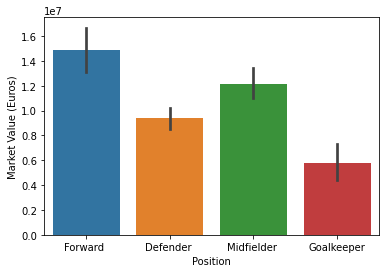

In [105]:
sns.barplot(x='Position', y='Market Value (Euros)', data= filtered_df)

**We can see that forwards and midfielders have more transfer value than defenders and goalkeepers**

In [106]:
filtered_df.isnull().sum()

PlayerName                             0
Affiliation                            0
League                                 0
Birth Date                             0
Age                                    0
Height (meters)                        0
Position                               0
Position 2                             1
Foot                                   0
nationality                            0
Games Played                           0
Market Value (Euros)                   7
Last Updated Date                      7
Accumulated Transfer Sums (Euros)      0
Highest Market Value (Euros)         101
Highest Market Value Date            101
NationalTeamCaps                       0
ContractExpYear                        0
dtype: int64

In [107]:
filtered_df['Position 2'].unique()

array(['Centre-Forward', 'Right-Back', 'Defensive Midfield', 'Goalkeeper',
       'Right Midfield', 'Left Winger', 'Attacking Midfield', 'Left-Back',
       'Centre-Back', 'Right Winger', 'Central Midfield',
       'Second Striker', 'Contract expires:30.06.2023', 'Left Midfield',
       'Contract expires:30.06.2021', nan, 'Contract expires:30.06.2025'],
      dtype=object)

In [108]:
#We already have secured position data as we have seen above. We can drop Position 2 column
filtered_df = filtered_df.drop('Position 2', axis=1) 

In [109]:
#We are going to drop last updated date as well, as it is of no use to us
filtered_df = filtered_df.drop('Last Updated Date', axis=1) 

In [110]:
filtered_df.corr()['Market Value (Euros)']

Age                                 -0.058448
Height (meters)                     -0.067469
Games Played                        -0.008184
Market Value (Euros)                 1.000000
Accumulated Transfer Sums (Euros)    0.603916
Highest Market Value (Euros)         0.960013
NationalTeamCaps                     0.335190
ContractExpYear                      0.321329
Name: Market Value (Euros), dtype: float64

In [111]:
#Let's fill in the missing market values based on their Accumulated Transfer Sums (Euros) 
#We did not pick highest market value here even though the correlation is 96% because it has null values
mgb= filtered_df.groupby('Accumulated Transfer Sums (Euros)').mean()['Market Value (Euros)']
mgb[0]

6027740.740740741

In [112]:
def fill_market_val(acc_value, market_value):
    if np.isnan(market_value):
        return mgb[acc_value]
    else:
        return market_value

In [113]:
filtered_df['Market Value (Euros)'] = filtered_df.apply(lambda x: fill_market_val(x['Accumulated Transfer Sums (Euros)'] , x['Market Value (Euros)']), axis=1)

In [114]:
filtered_df.isnull().sum()

PlayerName                             0
Affiliation                            0
League                                 0
Birth Date                             0
Age                                    0
Height (meters)                        0
Position                               0
Foot                                   0
nationality                            0
Games Played                           0
Market Value (Euros)                   0
Accumulated Transfer Sums (Euros)      0
Highest Market Value (Euros)         101
Highest Market Value Date            101
NationalTeamCaps                       0
ContractExpYear                        0
dtype: int64

In [115]:
filtered_df[filtered_df['Highest Market Value (Euros)'].isna()]

,PlayerName,Affiliation,League,Birth Date,Age,Height (meters),Position,Foot,nationality,Games Played,Market Value (Euros),Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,ContractExpYear
5,Darko Churlinov,1. FC Koln,Bundesliga,7/11/2000,19,1.80,Forward,right,North Macedonia,6,4.000000e+05,0,NaN,NaN,1,2020.0
50,Merveille Papela,1.FSV Mainz 05,Bundesliga,1/18/2001,18,1.74,Midfielder,right,Germany,1,6.027741e+06,0,NaN,NaN,4,2023.0
173,Borja Sainz,Alaves,LaLiga,2/1/2001,18,1.82,Forward,right,Spain,0,6.027741e+06,0,NaN,NaN,3,2022.0
198,Bukayo Saka,Arsenal,Premier League,9/5/2001,18,1.78,Forward,left,England,0,7.000000e+06,0,NaN,NaN,8,2022.0
557,Luca Unbehaun,Bor. Dortmund,Bundesliga,2/27/2001,18,1.86,Goalkeeper,right,Germany,5,4.000000e+05,0,NaN,NaN,0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,David Philipp,Werder Bremen,Bundesliga,4/10/2000,19,1.80,Midfielder,both,Germany,5,1.000000e+05,0,NaN,NaN,3,2022.0
4155,Ilia Gruev,Werder Bremen,Bundesliga,5/6/2000,19,1.85,Midfielder,right,Bulgaria,2,2.000000e+05,0,NaN,NaN,2,2020.0
4161,Luc Ihorst,Werder Bremen,Bundesliga,3/7/2000,19,1.90,Forward,both,Germany,4,1.500000e+05,0,NaN,NaN,3,2021.0
4235,Harry Burgoyne,Wolves,Premier League,12/28/1996,22,1.93,Goalkeeper,right,England,57,2.000000e+05,0,NaN,NaN,0,2020.0


In [116]:
#Now we need to fill the highest market value column
filtered_df.corr()['Highest Market Value (Euros)']

Age                                  0.022853
Height (meters)                     -0.071813
Games Played                        -0.004892
Market Value (Euros)                 0.960013
Accumulated Transfer Sums (Euros)    0.678873
Highest Market Value (Euros)         1.000000
NationalTeamCaps                     0.448312
ContractExpYear                      0.248153
Name: Highest Market Value (Euros), dtype: float64

In [117]:
filtered_df[filtered_df['Highest Market Value (Euros)'].isna()]['Age'].mean()

19.099009900990097

As we can see, mean age of the players who have their highest market value missing is very young. We can assume that these players are still growing and yet don't have that value. 
We can set the market value of these players as the highest market value. both of these columns correlate 96% 

In [118]:
filtered_df['Highest Market Value (Euros)'] = filtered_df.apply(lambda col : col['Market Value (Euros)'] if np.isnan(col['Highest Market Value (Euros)']) else col['Highest Market Value (Euros)'], axis=1)

In [119]:
filtered_df.isnull().sum()

PlayerName                             0
Affiliation                            0
League                                 0
Birth Date                             0
Age                                    0
Height (meters)                        0
Position                               0
Foot                                   0
nationality                            0
Games Played                           0
Market Value (Euros)                   0
Accumulated Transfer Sums (Euros)      0
Highest Market Value (Euros)           0
Highest Market Value Date            101
NationalTeamCaps                       0
ContractExpYear                        0
dtype: int64

In [120]:
#We will be dropping Highest Market Value(Date) as it is of no use to us to determine market value of a player
filtered_df= filtered_df.drop('Highest Market Value Date', axis=1)

In [121]:
filtered_df.isnull().sum()

PlayerName                           0
Affiliation                          0
League                               0
Birth Date                           0
Age                                  0
Height (meters)                      0
Position                             0
Foot                                 0
nationality                          0
Games Played                         0
Market Value (Euros)                 0
Accumulated Transfer Sums (Euros)    0
Highest Market Value (Euros)         0
NationalTeamCaps                     0
ContractExpYear                      0
dtype: int64

# Data is cleaned now. It is time to create dummy values of categorical features so that our model can use them

In [122]:
filtered_df.select_dtypes(include='object').columns

Index(['PlayerName', 'Affiliation', 'League', 'Birth Date', 'Position', 'Foot',
       'nationality'],
      dtype='object')

We can remove Player name,birth date, nationality as it is again not a criteria that will be required be determine the value of a player  

In [123]:
filtered_df = filtered_df.drop(['PlayerName', 'Birth Date', 'nationality'], axis=1)

**Let's now go through all the string features to see what we should do with them.**

In [124]:
affiliation = pd.get_dummies(filtered_df['Affiliation'], drop_first=True)

In [125]:
league = pd.get_dummies(filtered_df['League'], drop_first=True)

In [126]:
position = pd.get_dummies(filtered_df['Position'], drop_first=True)

In [127]:
foot = pd.get_dummies(filtered_df['Foot'], drop_first=True)

In [128]:
filtered_df = pd.concat([filtered_df, affiliation, league, position,foot], axis=1)

In [129]:
#Now we will drop these features as we have converted them into dummy variables
filtered_df = filtered_df.drop(['Affiliation', 'League', 'Position','Foot'], axis=1)

In [130]:
#Checking string values again
filtered_df.select_dtypes(include='object').columns

Index([], dtype='object')

In [131]:
#Let's take a look at our data now
filtered_df.head()

,Age,Height (meters),Games Played,Market Value (Euros),Accumulated Transfer Sums (Euros),Highest Market Value (Euros),NationalTeamCaps,ContractExpYear,1.FSV Mainz 05,AC Milan,...,Wolves,LaLiga,Ligue 1,Premier League,Serie A,Forward,Goalkeeper,Midfielder,left,right
0,31,1.87,1,7000000.0,45700000,20000000.0,16,2023.0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,25,1.82,0,1000000.0,1000000,1750000.0,11,2022.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25,1.75,0,4000000.0,4850000,4000000.0,1,2023.0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,20,1.87,14,100000.0,0,100000.0,0,2021.0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,1.79,15,1750000.0,7950000,3500000.0,5,2021.0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [132]:
filtered_df.columns

Index(['Age', 'Height (meters)', 'Games Played', 'Market Value (Euros)',
       'Accumulated Transfer Sums (Euros)', 'Highest Market Value (Euros)',
       'NationalTeamCaps', 'ContractExpYear', '1.FSV Mainz 05', 'AC Milan',
       ...
       'Wolves', 'LaLiga', 'Ligue 1', 'Premier League', 'Serie A', 'Forward ',
       'Goalkeeper', 'Midfielder ', 'left', 'right'],
      dtype='object', length=114)

# Train Test Split

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X= filtered_df.drop('Market Value (Euros)', axis=1)
y= filtered_df['Market Value (Euros)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Using Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [136]:
lm.fit(X_train, y_train)

LinearRegression()

In [137]:
np.sort(-lm.coef_)

array([-1.25415334e+11, -1.25414754e+11, -1.25414594e+11, -1.25414503e+11,
       -1.25414475e+11, -1.25414348e+11, -1.25414122e+11, -1.25414046e+11,
       -1.25414012e+11, -1.25414006e+11, -1.25413885e+11, -1.25413827e+11,
       -1.25413696e+11, -1.25413621e+11, -1.25413412e+11, -1.25413357e+11,
       -1.25413094e+11, -1.25412928e+11, -1.25412745e+11, -1.25411710e+11,
       -5.21650716e+10, -2.81161634e+10, -2.54398169e+10, -2.54389881e+10,
       -2.54375879e+10, -2.54368813e+10, -2.54368213e+10, -2.54366109e+10,
       -2.54365868e+10, -2.54365698e+10, -2.54363486e+10, -2.54360677e+10,
       -2.54358839e+10, -2.54358402e+10, -2.54355770e+10, -2.54354458e+10,
       -2.54350792e+10, -2.54350349e+10, -2.54349729e+10, -2.54349103e+10,
       -2.54344960e+10, -2.54341862e+10, -2.31839360e+06, -2.30569842e+06,
       -2.29422229e+06, -2.00017222e+06, -1.71994489e+06, -1.35694668e+06,
       -1.33156760e+06, -1.23411891e+06, -1.15548887e+06, -1.13697344e+06,
       -1.00081129e+06, -

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [138]:
predictions = lm.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values.**

<AxesSubplot:xlabel='Market Value (Euros)'>

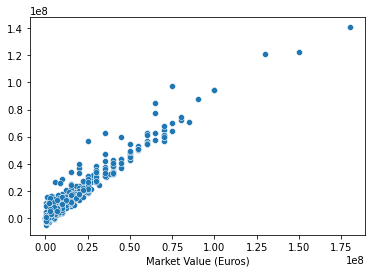

In [139]:
sns.scatterplot(x=y_test, y =predictions)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score 

In [140]:
from sklearn import metrics
metrics.explained_variance_score(y_test, predictions)

0.9387397554044602

In [141]:
MAE= metrics.mean_absolute_error(y_test, predictions)
MSE= metrics.mean_squared_error(y_test, predictions)
RMSE= np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("MAE: {}".format(MAE))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))

MAE: 2667967.517720604
MSE: 20234372540114.457
RMSE: 4498263.280435513


## Residuals

We should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

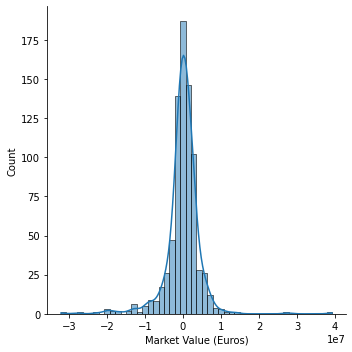

In [142]:
sns.displot((y_test-predictions),kde=True, bins=50)

In [143]:
dfg = pd.DataFrame(-np.sort(-lm.coef_), X.columns, columns=['Coeff']) 
pd.options.display.max_rows = None
dfg

,Coeff
Age,1.254153e+11
Height (meters),1.254148e+11
Games Played,1.254146e+11
Accumulated Transfer Sums (Euros),1.254145e+11
Highest Market Value (Euros),1.254145e+11
NationalTeamCaps,1.254143e+11
ContractExpYear,1.254141e+11
1.FSV Mainz 05,1.254140e+11
AC Milan,1.254140e+11
AS Roma,1.254140e+11
